In [22]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


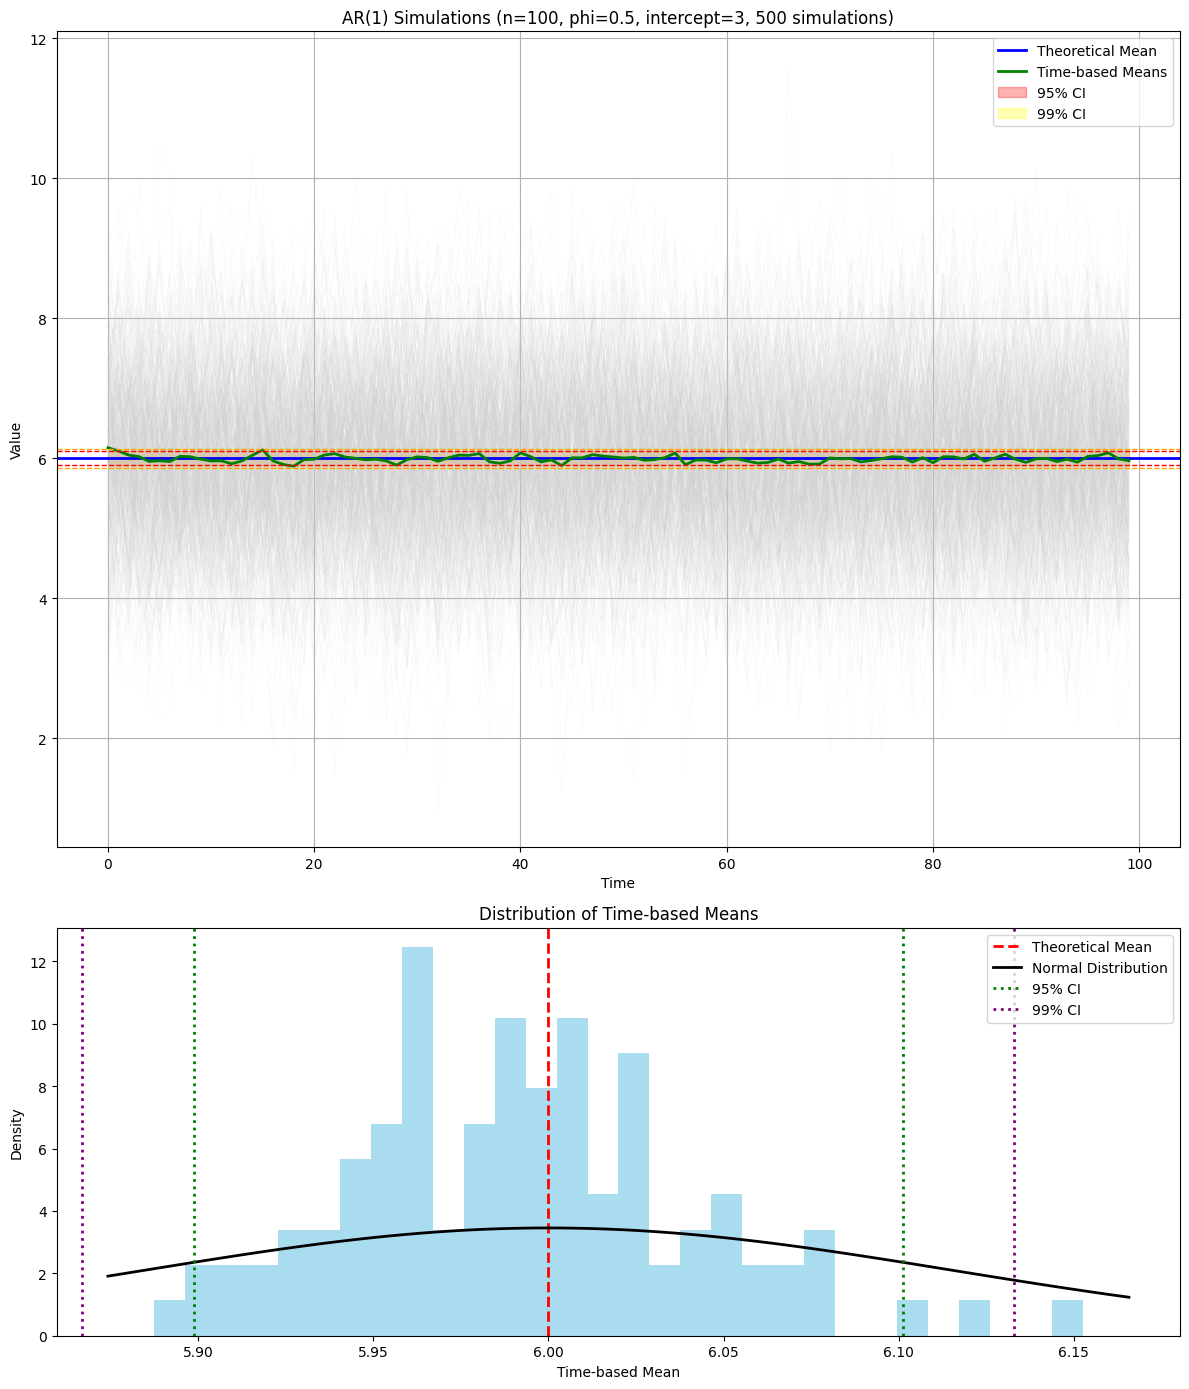

Theoretical mean: 6.0
Theoretical variance: 1.3333333333333333
95% CI: [5.898786035219113, 6.101213964780887]
99% CI: [5.866975932002263, 6.133024067997737]
Time-based means - Mean: 5.992490693764522, Std: 0.04907982340548928


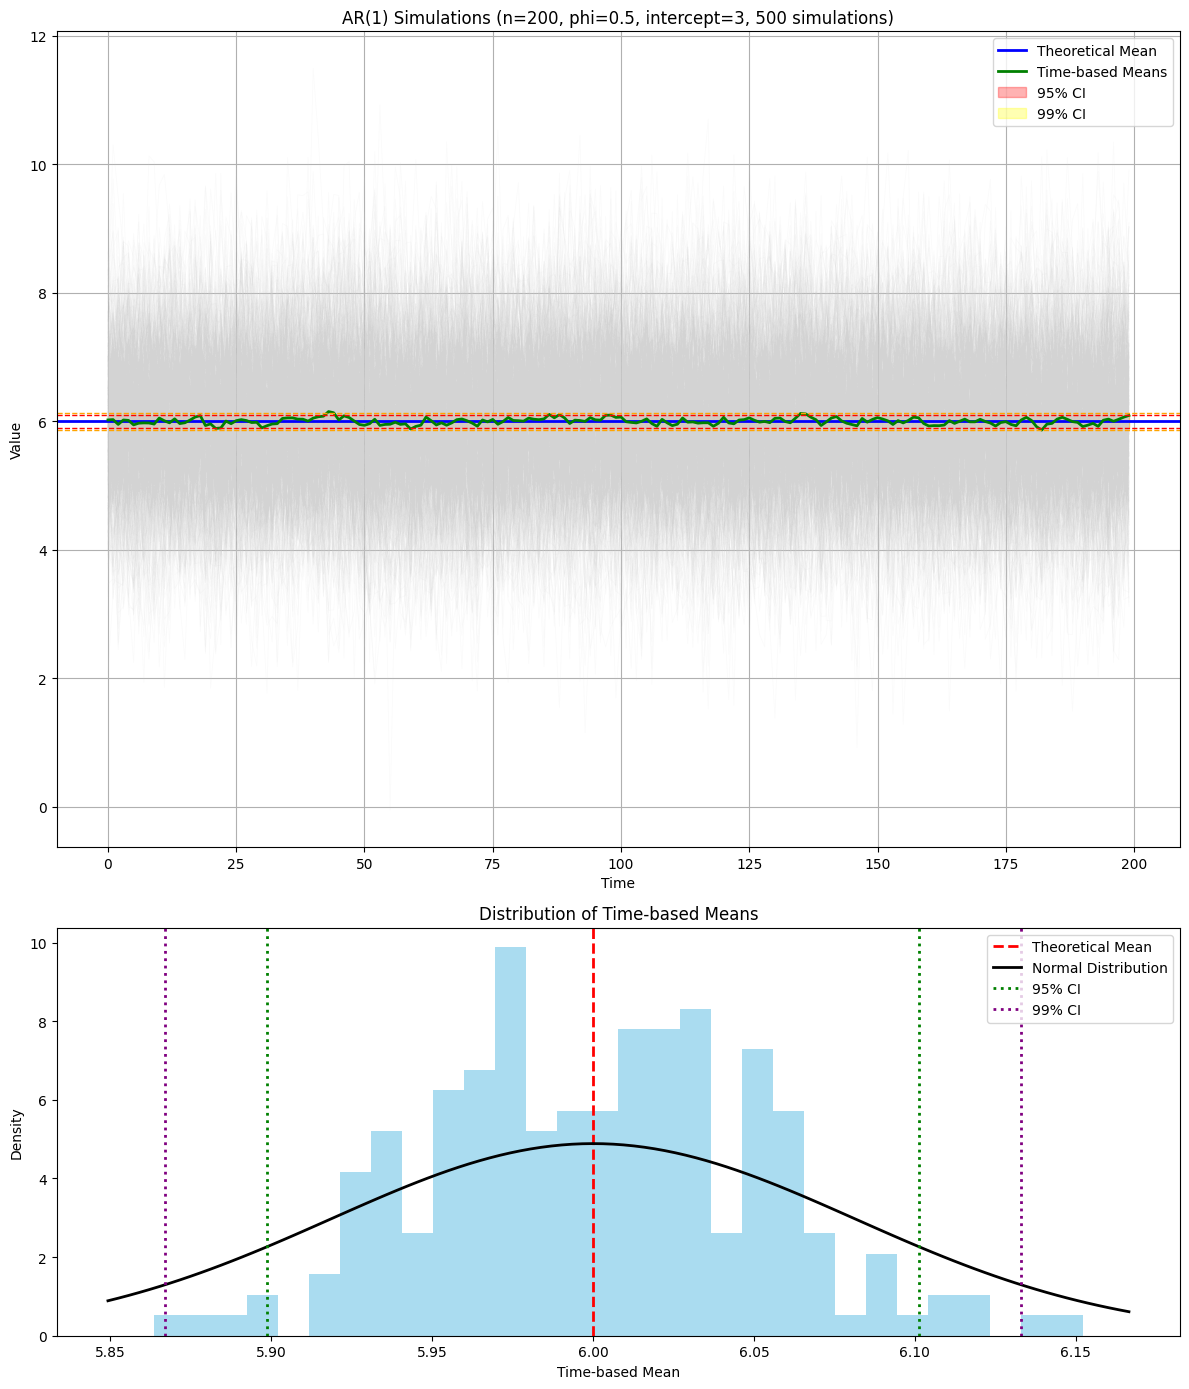

Theoretical mean: 6.0
Theoretical variance: 1.3333333333333333
95% CI: [5.898786035219113, 6.101213964780887]
99% CI: [5.866975932002263, 6.133024067997737]
Time-based means - Mean: 6.001311182556942, Std: 0.051186529304821524


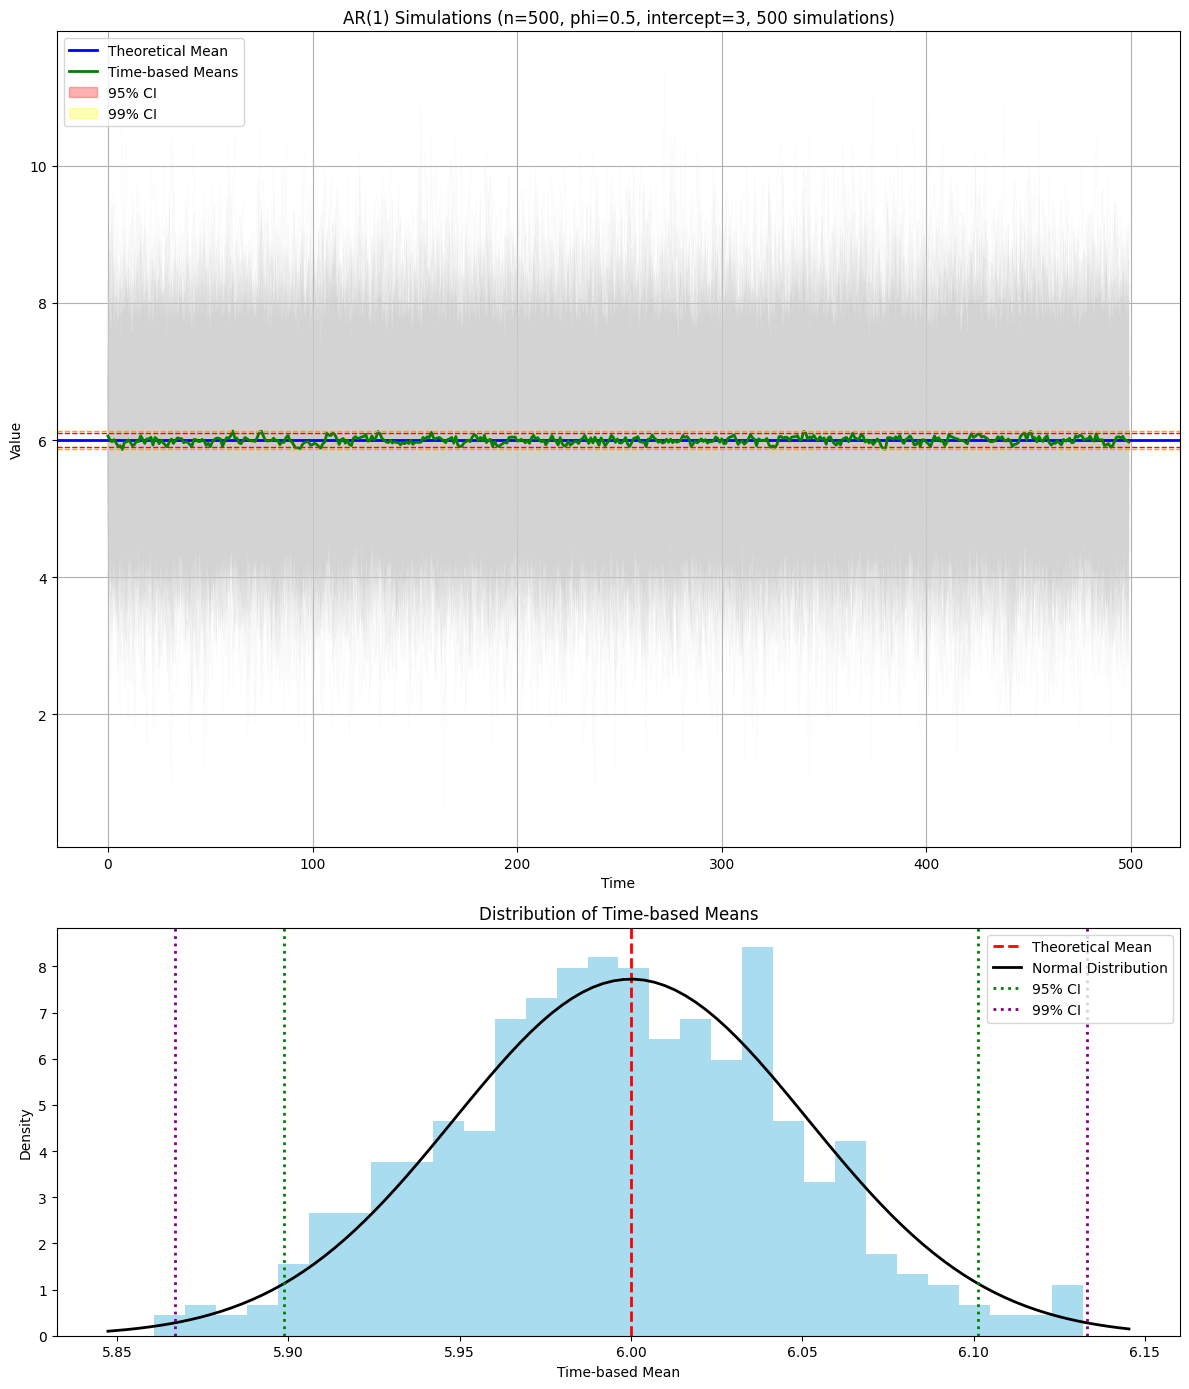

Theoretical mean: 6.0
Theoretical variance: 1.3333333333333333
95% CI: [5.898786035219113, 6.101213964780887]
99% CI: [5.866975932002263, 6.133024067997737]
Time-based means - Mean: 5.995768460744226, Std: 0.04993083550460895


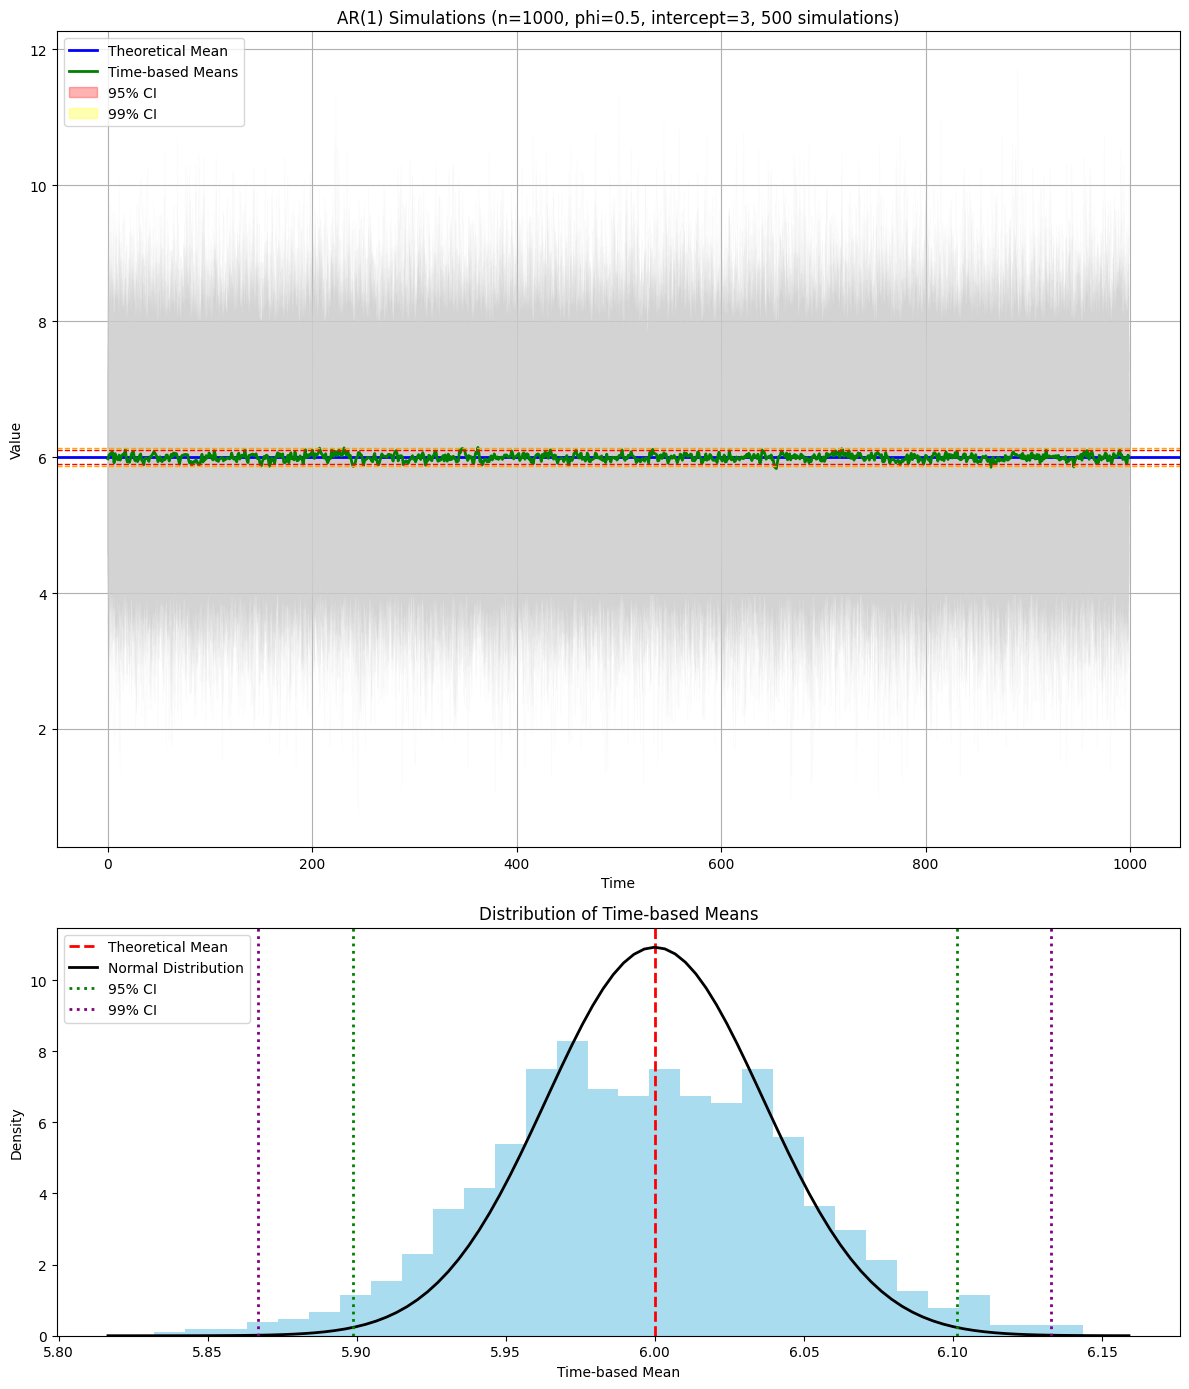

Theoretical mean: 6.0
Theoretical variance: 1.3333333333333333
95% CI: [5.898786035219113, 6.101213964780887]
99% CI: [5.866975932002263, 6.133024067997737]
Time-based means - Mean: 5.996121156285897, Std: 0.049692581123281426

Resultados:
|    n |   Dentro 95% CI |   Fuera 95% CI |   Proporción 95% |   Dentro 99% CI |   Fuera 99% CI |   Proporción 99% |
|-----:|----------------:|---------------:|-----------------:|----------------:|---------------:|-----------------:|
|  100 |         95.0000 |         5.0000 |           0.9500 |         99.0000 |         1.0000 |           0.9900 |
|  200 |        189.0000 |        11.0000 |           0.9450 |        197.0000 |         3.0000 |           0.9850 |
|  500 |        480.0000 |        20.0000 |           0.9600 |        499.0000 |         1.0000 |           0.9980 |
| 1000 |        952.0000 |        48.0000 |           0.9520 |        990.0000 |        10.0000 |           0.9900 |


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats
import time

# Establecer una semilla global basada en el tiempo actual
np.random.seed(int(time.time()))

def simulate_ar1(n, intercept, ar_coefficient, sd_error, burn_in=0):
    ar_data = np.zeros(n + burn_in)
    ar_data[0] = intercept / (1 - ar_coefficient) + np.random.normal(0, sd_error / np.sqrt(1 - ar_coefficient**2))
    for t in range(1, n + burn_in):
        ar_data[t] = intercept + ar_coefficient * ar_data[t - 1] + np.random.normal(0, sd_error)
    return ar_data[burn_in:]

def simulate_and_plot_ar1_with_ci(n_values, intercept, ar_coefficient, sd_error, burn_in=10, num_simulations=500):
    results = []
    for n in n_values:
        simulations = np.zeros((num_simulations, n))
        
        for i in range(num_simulations):
            simulations[i] = simulate_ar1(n=n, intercept=intercept, ar_coefficient=ar_coefficient, sd_error=sd_error, burn_in=burn_in)
        
        # Calculate mean for each time point across all simulations
        time_means = np.mean(simulations, axis=0)
        
        # Calculate theoretical mean and variance
        theoretical_mean = intercept / (1 - ar_coefficient)
        theoretical_variance = sd_error**2 / (1 - ar_coefficient**2)
        
        # Calculate confidence intervals for each time point
        ci_lower_95 = theoretical_mean - 1.96 * np.sqrt(theoretical_variance / num_simulations)
        ci_upper_95 = theoretical_mean + 1.96 * np.sqrt(theoretical_variance / num_simulations)
        
        ci_lower_99 = theoretical_mean - 2.576 * np.sqrt(theoretical_variance / num_simulations)
        ci_upper_99 = theoretical_mean + 2.576 * np.sqrt(theoretical_variance / num_simulations)
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [2, 1]})
        
        # Plot all simulations
        for i in range(num_simulations):
            ax1.plot(simulations[i], color='lightgray', alpha=0.1, linewidth=0.5)
        
        # Plot theoretical mean
        ax1.axhline(y=theoretical_mean, color='blue', linestyle='-', linewidth=2, label="Theoretical Mean")
        
        # Plot time-based means
        ax1.plot(time_means, color='green', linewidth=2, label="Time-based Means")
        
        # Plot confidence intervals
        ax1.fill_between(range(n), ci_lower_95, ci_upper_95, color='red', alpha=0.3, label="95% CI")
        ax1.fill_between(range(n), ci_lower_99, ci_upper_99, color='yellow', alpha=0.3, label="99% CI")
        
        # Add borders to confidence intervals
        ax1.axhline(y=ci_lower_95, color='red', linestyle='--', linewidth=1)
        ax1.axhline(y=ci_upper_95, color='red', linestyle='--', linewidth=1)
        ax1.axhline(y=ci_lower_99, color='orange', linestyle='--', linewidth=1)
        ax1.axhline(y=ci_upper_99, color='orange', linestyle='--', linewidth=1)
        
        ax1.set_title(f'AR(1) Simulations (n={n}, phi={ar_coefficient}, intercept={intercept}, {num_simulations} simulations)')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        ax1.grid(True)
        ax1.legend()
        
        # Plot histogram of time-based means
        ax2.hist(time_means, bins=30, density=True, alpha=0.7, color='skyblue')
        ax2.axvline(theoretical_mean, color='red', linestyle='dashed', linewidth=2, label='Theoretical Mean')
        
        # Plot normal distribution
        xmin, xmax = ax2.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, theoretical_mean, np.sqrt(theoretical_variance/n))
        ax2.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
        
        # Add confidence interval bars
        ax2.axvline(ci_lower_95, color='green', linestyle=':', linewidth=2, label='95% CI')
        ax2.axvline(ci_upper_95, color='green', linestyle=':', linewidth=2)
        ax2.axvline(ci_lower_99, color='purple', linestyle=':', linewidth=2, label='99% CI')
        ax2.axvline(ci_upper_99, color='purple', linestyle=':', linewidth=2)
        
        ax2.set_title('Distribution of Time-based Means')
        ax2.set_xlabel('Time-based Mean')
        ax2.set_ylabel('Density')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"Theoretical mean: {theoretical_mean}")
        print(f"Theoretical variance: {theoretical_variance}")
        print(f"95% CI: [{ci_lower_95}, {ci_upper_95}]")
        print(f"99% CI: [{ci_lower_99}, {ci_upper_99}]")
        print(f"Time-based means - Mean: {np.mean(time_means)}, Std: {np.std(time_means)}")
        
        # Calculate counts and proportions
        in_ci_95 = np.sum((time_means >= ci_lower_95) & (time_means <= ci_upper_95))
        out_ci_95 = n - in_ci_95
        in_ci_99 = np.sum((time_means >= ci_lower_99) & (time_means <= ci_upper_99))
        out_ci_99 = n - in_ci_99
        
        results.append([n, in_ci_95, out_ci_95, in_ci_95/n, in_ci_99, out_ci_99, in_ci_99/n])
    
    # Create and display the table
    headers = ["n", "Dentro 95% CI", "Fuera 95% CI", "Proporción 95%", "Dentro 99% CI", "Fuera 99% CI", "Proporción 99%"]
    print("\nResultados:")
    print(tabulate(results, headers=headers, tablefmt="pipe", floatfmt=".4f"))

# Parameters for the AR(1) process
phi = 0.5
c = 3
sd_error = 1

# Simulate for n=100, n=200, and n=1000 with 500 simulations each
n_values = [100, 200, 500, 1000]
simulate_and_plot_ar1_with_ci(n_values, intercept=c, ar_coefficient=phi, sd_error=sd_error)